In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [3]:
data = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [5]:
x_valid, x_train = X_train[:5000]/255, X_train[5000:]/255
y_valid, y_train1 = y_train[:5000], y_train[5000:]

In [6]:
x_valid.shape, x_train.shape, y_valid.shape, y_train1.shape

((5000, 28, 28), (55000, 28, 28), (5000,), (55000,))

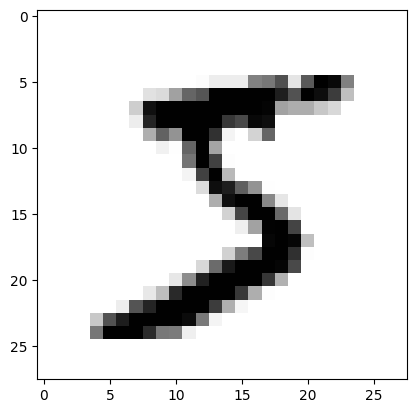

In [7]:
plt.imshow(x_valid[0], cmap='binary')

In [8]:
LAYER = [
    tf.keras.layers.Flatten(input_shape=[28,28], name='InputLayer'),
    tf.keras.layers.Dense(300, activation='relu', name='HiddenLayer1'),
    tf.keras.layers.Dense(100, activation='relu', name='HiddenLayer2'),
    tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer'),
]

In [9]:
model = tf.keras.models.Sequential(LAYER)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']

model.compile(loss = LOSS_FUNCTION,optimizer = OPTIMIZER, metrics = METRICS)

In [15]:
EPOCHS = 10
VALIDATION_SET = (x_valid, y_valid)

model_history = model.fit(x_train, y_train1, epochs = EPOCHS, validation_data=VALIDATION_SET)

Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2119 - accuracy: 0.9382 - val_loss: 0.1101 - val_accuracy: 0.9674
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0901 - accuracy: 0.9720 - val_loss: 0.0777 - val_accuracy: 0.9750
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0591 - accuracy: 0.9813 - val_loss: 0.0707 - val_accuracy: 0.9788
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0450 - accuracy: 0.9846 - val_loss: 0.0801 - val_accuracy: 0.9756
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.1029 - val_accuracy: 0.9716
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0249 - accuracy: 0.9912 - val_loss: 0.0706 - val_accuracy: 0.9798
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0234 - accuracy: 0.9923 - val_loss: 0.0802 - val_acc

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 20.5681 - accuracy: 0.9807


[20.568117141723633, 0.9807000160217285]

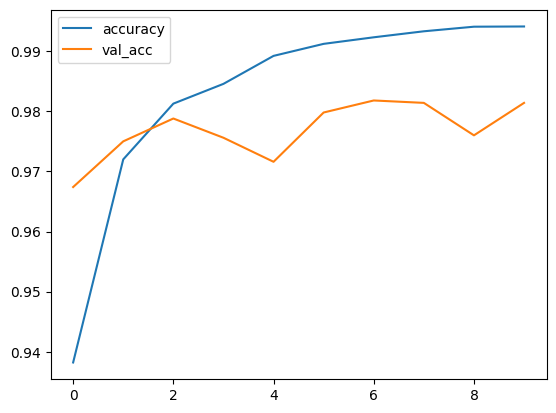

In [17]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label='val_acc')
plt.legend(['accuracy','val_acc'], loc='upper left')
plt.show()

In [25]:
x_new = X_test[3]
y_new = y_test[3]
y_prob = model.predict(np.expand_dims(x_new, axis=0))
y_pred = np.argmax(y_prob, axis=-1)

1/1 [==============================] - 0s 100ms/step


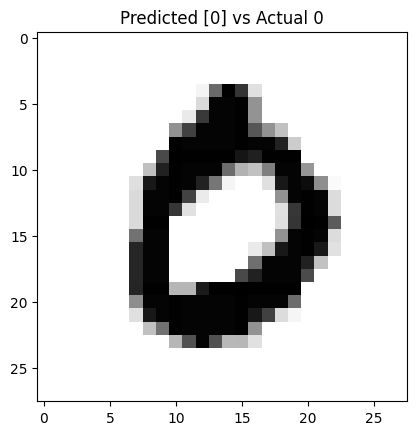

In [27]:
plt.imshow(x_new, cmap='binary')
plt.title(f"Predicted {y_pred} vs Actual {y_new}")
plt.show()